# KNN Regression


In [1]:
import numpy as np
import pandas as pd

#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

'''
Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. 
For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], 
or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling 
to the test set for meaningful results. You can use StandardScaler for standardization.
'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)



In [2]:
X_train.shape

(354, 13)

In [5]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()

# n_neighbors: Number of neighbors 
# weight: ‘uniform’ : uniform weights. ‘distance’ : weight points by the inverse of their distance.
# p Power parameter for the Minkowski metric.
# n_job:  number of parallel jobs to run (-1)

parameters = {'n_neighbors': np.arange(15, 30)
              #,'p': [1,2,3]
            }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 50, scoring ='r2')#,scoring ='neg_mean_absolute_error') 
#with no params it reduces to a CV
#'neg_mean_absolute_error',
#'neg_mean_squared_error'
# 'r2'

gs = gs.fit(X_train,y_train)



Fitting 3 folds for each of 15 candidates, totalling 45 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.750, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.685, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.641, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=16 ..................................................
[CV] ...................... n_neighbors=16, score=0.738, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

In [6]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.691849 using {'n_neighbors': 15}
0.691849 (0.044859) with: {'n_neighbors': 15}
0.684732 (0.039093) with: {'n_neighbors': 16}
0.678025 (0.039702) with: {'n_neighbors': 17}
0.675140 (0.041873) with: {'n_neighbors': 18}
0.666092 (0.042027) with: {'n_neighbors': 19}
0.660721 (0.042485) with: {'n_neighbors': 20}
0.660456 (0.036264) with: {'n_neighbors': 21}
0.656995 (0.036467) with: {'n_neighbors': 22}
0.647727 (0.034851) with: {'n_neighbors': 23}
0.642640 (0.037698) with: {'n_neighbors': 24}
0.636585 (0.038850) with: {'n_neighbors': 25}
0.632120 (0.039774) with: {'n_neighbors': 26}
0.625927 (0.041388) with: {'n_neighbors': 27}
0.621937 (0.040266) with: {'n_neighbors': 28}
0.615435 (0.041652) with: {'n_neighbors': 29}


0.6568278463778665

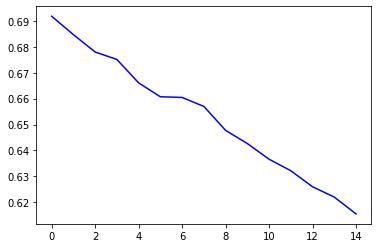

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

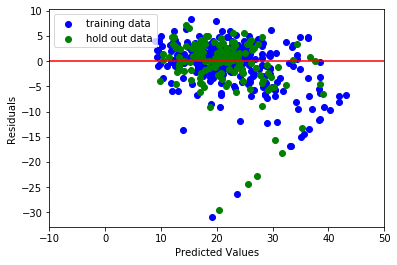

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [9]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.922806026365348
MSE train:  20.254226616446953
RMSE train:  4.500469599547024
r2:  0.8740142779941644
MAE test:  3.251052631578947
MSE test:  27.73795029239766
RMSE test:  5.266683044611443
r2:  0.8104491633519443
